In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df = df.drop_duplicates()
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df['Sex'] = df['Sex'].map({'female':1, 'male':0}).astype(int)
df['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

<Axes: >

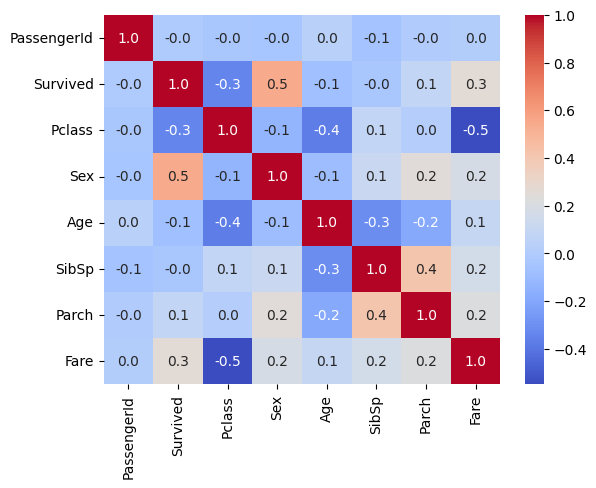

In [9]:
numeric_columns = df.select_dtypes(include=['number'])

corr= numeric_columns.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.1f')

In [10]:
from sklearn.linear_model import LinearRegression


train_data = df.dropna(subset=['Age'])
X_train = train_data[['Pclass']] 
y_train = train_data['Age'] 


model = LinearRegression()
model.fit(X_train, y_train)


missing_data = df[df['Age'].isna()]
X_missing = missing_data[['Pclass']]
df.loc[df['Age'].isna(), 'Age'] = model.predict(X_missing)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [12]:
df_encoding = pd.get_dummies(df, columns=['Embarked'], drop_first=True, dtype='int')
print(df_encoding.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_Q   891 non-null    int64  
 12  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB
None


## EDA

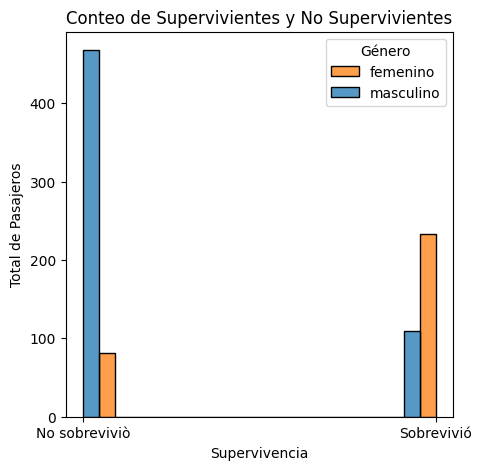

In [14]:
figure = plt.subplots(figsize = (5, 5))

ax= sns.histplot(data=df_encoding, x='Survived', hue='Sex', multiple='dodge')
ax.legend(title='Género', labels=['femenino', 'masculino'])
ax.set_xticks([0, 1])
ax.set_xticklabels(['No sobreviviò', 'Sobrevivió'])
plt.title('Conteo de Supervivientes y No Supervivientes')
plt.xlabel('Supervivencia')
plt.ylabel('Total de Pasajeros')

plt.show()

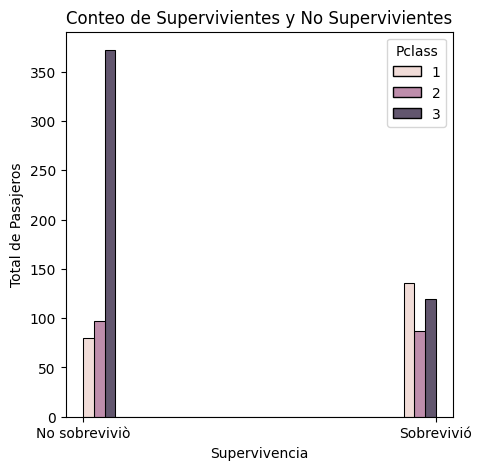

In [15]:
figure = plt.subplots(figsize = (5, 5))

ax= sns.histplot(data=df_encoding, x='Survived', hue='Pclass', multiple='dodge')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No sobreviviò', 'Sobrevivió'])
plt.title('Conteo de Supervivientes y No Supervivientes')
plt.xlabel('Supervivencia')
plt.ylabel('Total de Pasajeros')

plt.show()

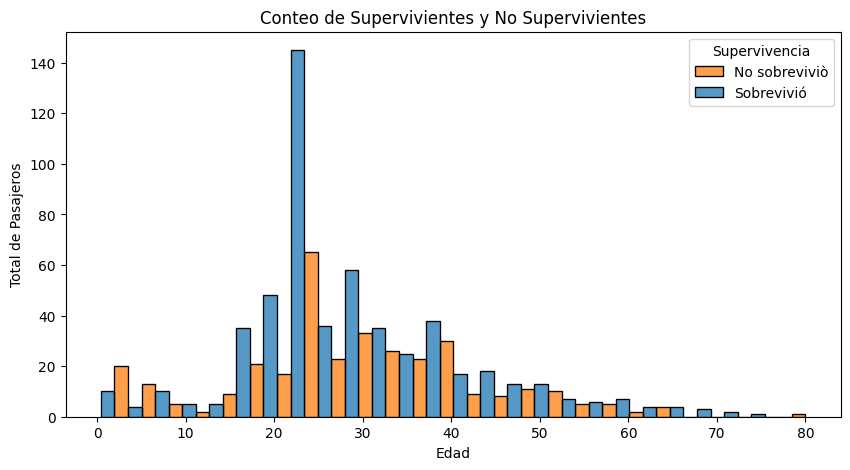

In [16]:
figure = plt.subplots(figsize = (10, 5))

ax= sns.histplot(data=df_encoding, x='Age', hue='Survived', multiple='dodge')
ax.legend(title='Supervivencia', labels=['No sobreviviò', 'Sobrevivió'])

plt.title('Conteo de Supervivientes y No Supervivientes')
plt.xlabel('Edad')
plt.ylabel('Total de Pasajeros')

plt.show()

In [17]:
df_new = df_encoding.select_dtypes(include=['number'])


In [18]:
df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.000000,1,0,7.2500,0,1
1,2,1,1,1,38.000000,1,0,71.2833,0,0
2,3,1,3,1,26.000000,0,0,7.9250,0,1
3,4,1,1,1,35.000000,1,0,53.1000,0,1
4,5,0,3,0,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0,1
887,888,1,1,1,19.000000,0,0,30.0000,0,1
888,889,0,3,1,24.815091,1,2,23.4500,0,1
889,890,1,1,0,26.000000,0,0,30.0000,0,0


## Entrenamiento

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target = df_new['Survived']
X = df_new.drop(columns='Survived')

X_train, X_val, y_train, y_val = train_test_split(X, target, test_size=0.2, random_state=42)

print(y_train.shape, X_train.shape)

(712,) (712, 9)


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_val)

logisctic_accuracy = accuracy_score(y_val, y_pred_logistic)

print("Logistic Regression Accuracy:", logisctic_accuracy)

Logistic Regression Accuracy: 0.8100558659217877


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

rf_accuracy = accuracy_score(y_val, y_pred_rf)
print("RandomForestClassifier:", rf_accuracy)

RandomForestClassifier: 0.8268156424581006


In [23]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'penalty': ['elasticnet'],  # Tipo de penalización
    'C': [0.01, 0.1, 1],  # Parámetro de regularización
    'solver': ['saga'],  # Algoritmos de optimización
    'max_iter' : [10000],
    'l1_ratio': [0.2, 0.5, 0.7]  # Solo para elasticnet, controla la mezcla L1/L2
}


grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, target)

print("Mejores parámetros:", grid_search.best_params_)

predictions = grid_search.predict(X_val)

Mejores parámetros: {'C': 1, 'l1_ratio': 0.7, 'max_iter': 10000, 'penalty': 'elasticnet', 'solver': 'saga'}


In [24]:
best_model = grid_search.best_estimator_

In [25]:
from sklearn.model_selection import cross_val_score
models = [
  ("Logistic Regression", LogisticRegression(max_iter=800)),
  ("Random Forest", RandomForestClassifier())
]

for name, model in models:
    scores = cross_val_score(model, X, target, cv=5) 
    print(f"{name} Average Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Logistic Regression Average Accuracy: 0.80 (+/- 0.03)
Random Forest Average Accuracy: 0.80 (+/- 0.10)


## Prediccion


In [27]:
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder()

test = pd.read_csv('Dataset/test.csv')

test['Sex'] = test['Sex'].map({'female':1, 'male':0}).astype(int)

train_data = test.dropna(subset=['Age'])
X_train = train_data[['Pclass']] 
y_train = train_data['Age'] 


model = LinearRegression()
model.fit(X_train, y_train)


missing_data2 = test[test['Age'].isna()]
X_missing2 = missing_data2[['Pclass']]
test.loc[test['Age'].isna(), 'Age'] = model.predict(X_missing2)

test_encoding = pd.get_dummies(test, columns =['Embarked'], drop_first=True,  dtype='int')

test_1 = test_encoding.select_dtypes(include=['number'])
test_1['Fare'] = test_1['Fare'].fillna(test_1['Fare'].median())

y_pred = best_model.predict(test_1)
y_pred

y_pred.shape, test_1.shape

((418,), (418, 9))

In [28]:

# prediciendo sobre el test set
print(y_pred_logistic[0:20])
# para descargar en ordenador
def download_output(y_pred, name):
  output = pd.DataFrame({'PassengerId': test_1.PassengerId, 
                         'Survived': y_pred})
  output.to_csv(name, index=False)
download_output(y_pred, 'ml_prediction.csv')

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0]
